# Assignment 1: Train a simple neural network to classify the handwritten digits from the MNIST database
### Ph22 / Caltech / Spring 2024

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import yaml
import gzip
import tqdm
import asciichartpy
import pickle

from timeit import default_timer as timer

# our special libraries for the network
import network

In this assignment, we will be implementing a neural network from scratch! The task is to classify handwritten digits given images of the same. We'll be using the MNIST dataset. Below is some helper code that loads the dataset. Take a look at how at both the input (image) and output (digit) is encoded in our setting: 

In [10]:
# functions to load the MNIST data
def load_data():
    """
    Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.
    """
    with gzip.open('data/mnist.pkl.gz', 'rb') as f:
        # In Python 3, 'encoding' must be specified when reading Python 2 pickled files
        training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """
    Return a tuple containing (training_data, validation_data, test_data).

    MNIST data is a 28x28 pixel image, with each pixel brightness value ranging from 0 to 1. 
    Reshape it into a 28x28 = 784 element row vector.
    """
    tr_d, va_d, te_d  = load_data()
    training_inputs   = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results  = [vectorized_result(y) for y in tr_d[1]]
    training_data     = list(zip(training_inputs, training_results)) # Explicitly convert to list
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data   = list(zip(validation_inputs, va_d[1]))        # Explicitly convert to list
    test_inputs       = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data         = list(zip(test_inputs, te_d[1]))              # Explicitly convert to list
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """
    Return a 10-dimensional unit vector with a 1.0 in the jth position and zeroes elsewhere.
    """
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

### Part 1: Warm up

- Let's get some practice with handling data and reshaping matrices. Using matplotlib, plot some of the handwritten digits as images. 
- Write a short program that randomly assigns one of the digits to every image in the test_data. What's the success probability? 

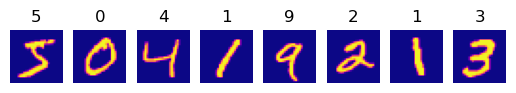

Success Probability: 10.34%


In [38]:
# functions to load the MNIST data
import numpy as np
import matplotlib.pyplot as plt

# our special libraries for the network

def load_data():
    """
    Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.
    """
    with gzip.open('data/mnist.pkl.gz', 'rb') as f:
        # In Python 3, 'encoding' must be specified when reading Python 2 pickled files
        training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
    return (training_data, validation_data, test_data)

def load_data_wrapper():
    """
    Return a tuple containing (training_data, validation_data, test_data).

    MNIST data is a 28x28 pixel image, with each pixel brightness value ranging from 0 to 1. 
    Reshape it into a 28x28 = 784 element row vector.
    """
    tr_d, va_d, te_d  = load_data()
    training_inputs   = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results  = [vectorized_result(y) for y in tr_d[1]]
    training_data     = list(zip(training_inputs, training_results)) # Explicitly convert to list
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data   = list(zip(validation_inputs, va_d[1]))        # Explicitly convert to list
    test_inputs       = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data         = list(zip(test_inputs, te_d[1]))              # Explicitly convert to list
    return (training_data, validation_data, test_data)

def vectorized_result(j):
    """
    Return a 10-dimensional unit vector with a 1.0 in the jth position and zeroes elsewhere.
    """
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e
training_data, validation_data, test_data=load_data_wrapper()
def plot(data, image_number):
    for  index, (image,image_label) in enumerate(data[:image_number]):
        plt.subplot(1, image_number, index + 1)
        plt.axis('off')
        plt.imshow(image.reshape(28, 28), cmap='plasma')
        plt.title(np.argmax(image_label))
    plt.show()
plot(training_data,8)
def random_allocation(data):
    correct_allocation=0
    for label in map(lambda x: x[1], data):
        digit=np.random.randint(0,10)
        if digit==label:
            correct_allocation+=1
    return correct_allocation/len(data)
success_prob=random_allocation(test_data)
print(f'Success Probability: {success_prob * 100}%')
    

### Part 2: Training neural networks

The code below first gets network parameters (architecture, activation function, learning rate, mini-batch size and epochs) by loading the network_config.yaml file. Then, it loads the MNIST dataset. 

In [9]:

# Load configuration from the YAML file
with open('network_config.yaml', 'r') as file:
    config = yaml.safe_load(file)

training_data, validation_data, test_data = load_data_wrapper()
print("Loaded the MNIST database...")

Loaded the MNIST database...
Thinking Machine Awakened...
Training the NN...


Training Progress:   0%|          | 0/30 [00:00<?, ?it/s]


IndexError: list index out of range

- The file network.py contains a class Network that implements the neural network and its training. Write the missing functions in network.py (instructions for this part are in the file itself). 

Below is sample code for using network.py to train the neural network and display the process graphically. Here, we call network.Network to initialize the neural network with given parameters from the yaml file and the net.SGD routine runs the "training" part of the neural network. 

In [1]:
# Initialize the Network with configurations from YAML file
net = network.Network(config['network_structure'], 
                      config['activation_functions'])
print("Thinking Machine Awakened...")


print("Training the NN...")
t0 = timer()
# use Stochastic Gradient Descent to optimize the network
net.SGD(training_data, 
        config['epochs'], 
        config['mini_batch_size'], 
        config['learning_rate'], 
        test_data=test_data)

print("Done Training and Testing the Machina.")
print("Training time = {:0.1f}".format(timer() - t0) + " seconds.")

NameError: name 'network' is not defined

### Part 3: Playing with parameters

- Using the given parameters, the neural network probably doesn't do too well on the task. Play around with architecture, activation function, learning rate, mini-batch size and epochs. In particular, design an experiment that elucidates the role of one of these parameters. For example, one experiment could be: for fixed parameters, plot the loss schedule for learning rate = 0.1, 1 and 10 and see how it changes. Will you keep getting better accuracy if you keep increasing learning rate? 

c) with the initial parameters given, the accuracy rate fluctuated within the 
10% .
Afterwards, I changed the activation rates as follows: activation_functions: ['sigmoid', 'sigmoid', 'sigmoid', 'sigmoid']
which enabled me to reach  around 95% accuracy rate. I also made some adjustements to SDG funciton just to explore that decaying the learning rate could be useful as this means that the method starts with a larger learning rate to make big improvements quickly and then reduces the learning rate over time to make smaller, more precise adjustments. This helps the model learn better without missing or overshooting the best solution.

In [8]:
from IPython.display import Image
print("After changing activation rates:")
Image(url="https://github.com/Lakloukitta/screenshot/blob/main/Screenshot%202024-04-06%20at%205.20.34%20PM.png?raw=true")


After changing activation rates:
